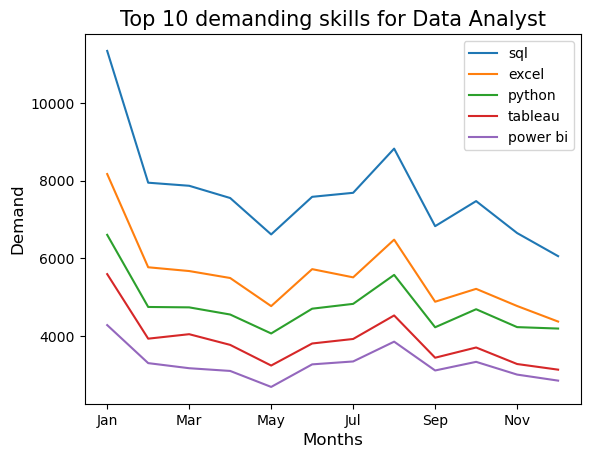

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df_og = df.copy()
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')


df.dropna(subset = "job_skills", inplace = True)
df = df[df['job_title_short'] == 'Data Analyst']

import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_ex = df.explode("job_skills")

df_pivot = df_ex.pivot_table(index = "job_posted_month", columns = "job_skills", aggfunc = "size", fill_value = 0)
df_pivot.loc["Total"] = df_pivot.sum()
df_pivot = df_pivot.sort_values(by = "Total", ascending = False, axis = 1)

df_pivot_og = df_pivot.copy()

df_pivot = df_pivot.iloc[:,:5]
df_pivot.drop(labels = 'Total', inplace = True)
df_pivot = df_pivot.reset_index().rename_axis("index", axis = 1)
df_pivot['job_posted_month_no'] = pd.to_datetime(df_pivot.job_posted_month, format = "%b").dt.month
df_pivot.sort_values("job_posted_month_no", inplace = True)
df_pivot = df_pivot.set_index("job_posted_month")
df_pivot = df_pivot.rename_axis("", axis = 1)
df_pivot.drop("job_posted_month_no", axis = 1, inplace = True)

df_pivot.plot(kind = "line")
plt.title('Top 10 demanding skills for Data Analyst', fontsize = 15)
plt.xlabel("Months", fontsize = 12)
plt.ylabel("Demand", fontsize = 12)
plt.show()

In [2]:
# Lets add customization to our chart

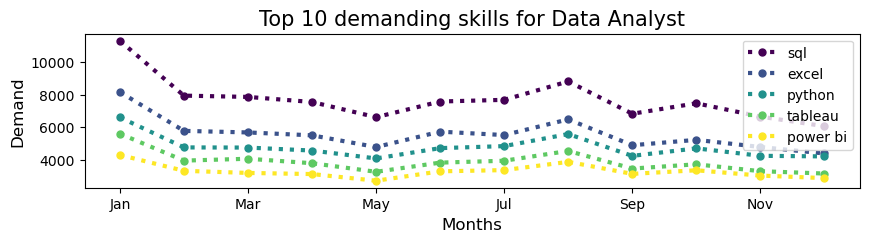

In [3]:
df_pivot.plot(kind = "line"
              ,linewidth = 3
              ,linestyle = ":"
              ,colormap = "viridis"
              ,marker = "o"
              ,markersize = 5
              ,figsize = (10,2)
              )
plt.title('Top 10 demanding skills for Data Analyst', fontsize = 15)
plt.xlabel("Months", fontsize = 12)
plt.ylabel("Demand", fontsize = 12)
plt.show()

In [4]:
# For colormap varients refer :
# https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

# For more customization refer matplotlib.

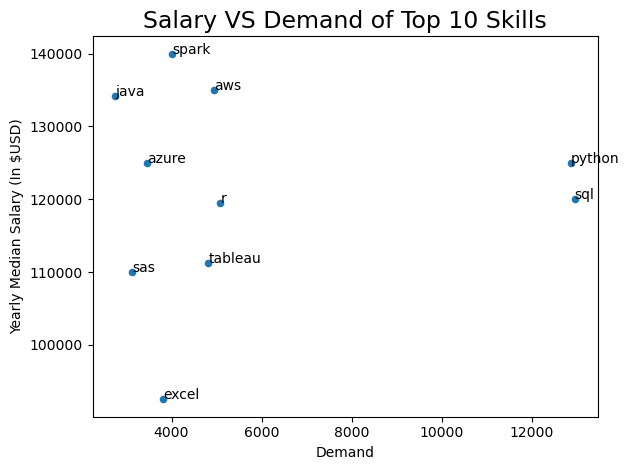

In [5]:
df2 = df_og.copy()

skno = 10 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk)

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()


In [6]:
# Say I want Top 40 skills

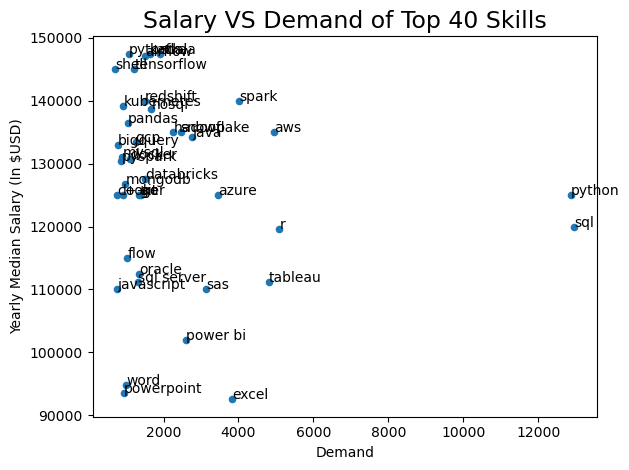

In [7]:
df2 = df_og.copy()

skno = 40 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk)

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()


In [8]:
# See how cluttered it become. For this exact problem we have a library adjustText 
# Lemme show u how it works

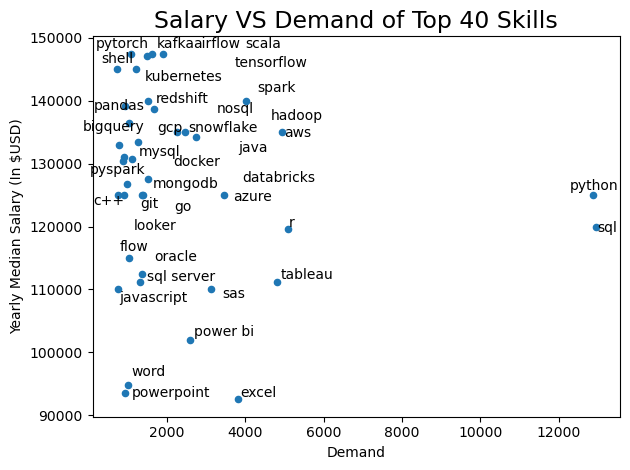

In [9]:
df2 = df_og.copy()

skno = 40 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

from adjustText import adjust_text
txts = []

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    txts.append(plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk))
adjust_text(txts)

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()

In [10]:
# See it become readable.
# But it hard to distunguish which dot represent which skill
# for that we can do some customizations in adjust_text()

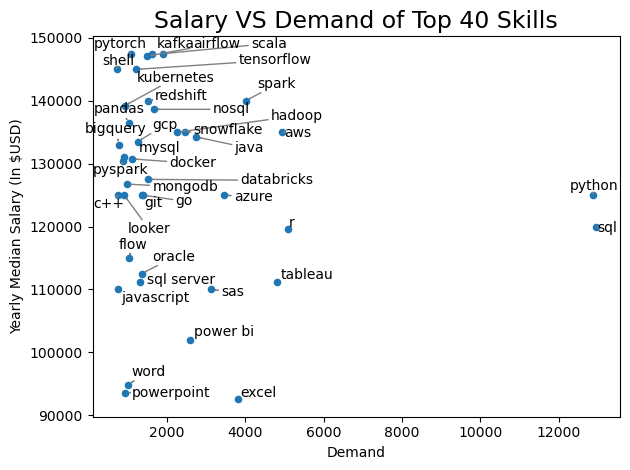

In [11]:
df2 = df_og.copy()

skno = 40 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

from adjustText import adjust_text
txts = []

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    txts.append(plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk))
adjust_text(txts, arrowprops=dict(arrowstyle='->', color='grey', lw = 1))

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()


In [12]:
# It become fineish.... :0 considering 40!! f+cking Skills.
# Moreover you can learn more at here :
# https://adjusttext.readthedocs.io/en/latest/

In [14]:
# Okay Now say I want to format the y axis numbers in $100k format
# for that we will use matplotlib.pyplot.axes.set_major_formatter()
# As you can see this function is design to be applied on axes 
# So either we go tradition way of fig, ax =  OR
# we can use matplotlib.pyplot.gca() to get the axis [gca = get current axis]

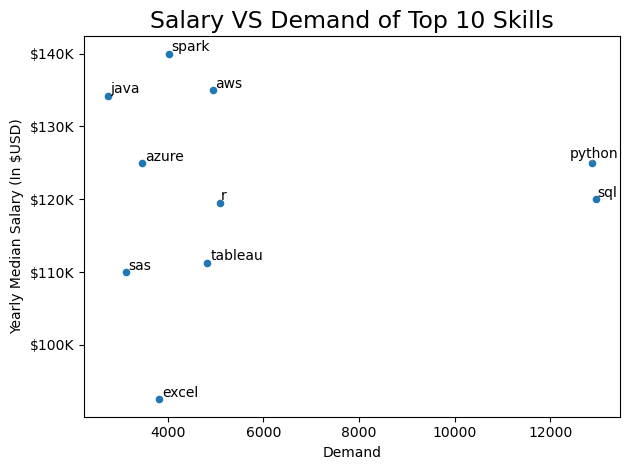

In [ ]:
df2 = df_og.copy()

skno = 10 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

from adjustText import adjust_text
txts = []

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    txts.append(plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk))
adjust_text(txts, arrowprops=dict(arrowstyle='->', color='grey', lw = 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K'))

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()


In [20]:
# Good. Now I want to convert the Demand into percentages

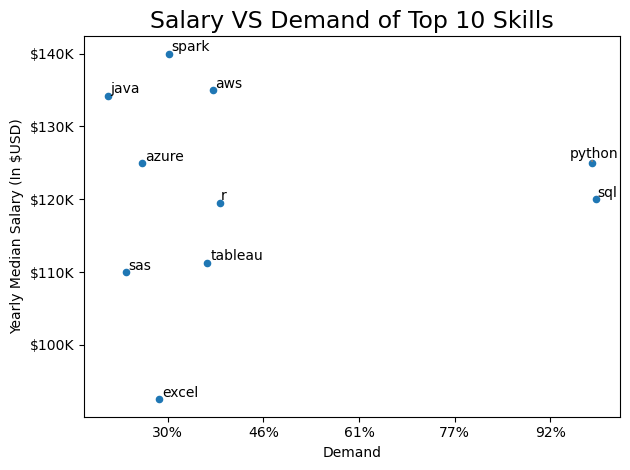

In [24]:
df2 = df_og.copy()

skno = 10 # No of skills you want to display
df2.dropna(subset = "job_skills", inplace = True)
df2.dropna(subset = "salary_year_avg", inplace = True)

import ast
df2['job_skills'] = df2.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df2_ex = df2.explode("job_skills")

df2_plt_og = df2_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median")
    ,demand = ("job_skills", "size"))

df2_plt = df2_plt_og.sort_values(by = "demand", ascending = False).head(skno).copy()

from adjustText import adjust_text
txts = []

df2_plt.plot(kind = "scatter", x = "demand", y = "median_salary")
for i, sk in enumerate(df2_plt.index) :
    txts.append(plt.text(y = df2_plt.median_salary.iloc[i], x = df2_plt.demand.iloc[i], s = sk))
adjust_text(txts, arrowprops=dict(arrowstyle='->', color='grey', lw = 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'{int(x/129.51)}%'))

plt.title(f"Salary VS Demand of Top {skno} Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()
